In [2]:
import matplotlib.pyplot as plt
import typing as tp


In [3]:
def calculate_pareto_frontier(data):
    pareto_frontier = [data[0]]  # Initialize the Pareto frontier with the first data point

    for point in data[1:]:
        # Check if the current point dominates any point on the Pareto frontier
        is_dominated = False
        frontier_copy = pareto_frontier.copy()  # Create a copy to avoid modifying the frontier during iteration

        for frontier_point in frontier_copy:
            if point['f1'] <= frontier_point['f1'] and point['connectedness'] <= frontier_point['connectedness']:
                # If the current point is worse or equal in both metrics, it is dominated
                is_dominated = True
                break

            if point['f1'] >= frontier_point['f1'] and point['connectedness'] >= frontier_point['connectedness']:
                # If the current point is better or equal in both metrics, it dominates the frontier point
                pareto_frontier.remove(frontier_point)

        if not is_dominated:
            pareto_frontier.append(point)  # Add the current point to the Pareto frontier

    return pareto_frontier

In [4]:
# Example usage
import random

random.seed(43)
data = [{'f1': random.random(), 'connectedness': random.random(), 'epoch': i} for i in range(20)]


In [5]:
def plot_pareto_frontier(d: tp.List[dict], pf: tp.List[dict], epochs=False):
    """Plot pareto frontier and consecutive epochs line.

    Args:
        d (tp.List[dict]): All data points to plot.
        pf (tp.List[dict]): Pareto frontier data points to plot.
    """
    # Extract metric values from Pareto frontier
    pf_copy = pf.copy()
    pf_copy.sort(key=lambda x: x['f1'])
    pareto_A = [point['f1'] for point in pf_copy]
    pareto_B = [point['connectedness'] for point in pf_copy]

    d.sort(key=lambda x: x['epoch'])

    # Creating a pastel gradient color for each epoch data point
    cmap = plt.get_cmap('hot_r')

    # Extract data points
    x = [point['f1'] for point in d]
    y = [point['connectedness'] for point in d]
    c = [point['epoch'] for point in d]

    # Create plot
    fig = plt.figure(figsize=(8, 6))

    # Plotting the Pareto frontier
    ax1 = plt.scatter(x, y, c=c, marker='x', cmap=cmap)
    fig.colorbar(ax1, label='Epoch')

    for i in range(len(d)):
        plt.text(x=d[i]['f1']+0.01,y=d[i]['connectedness']+0.01,s=d[i]['epoch'], 
                fontdict=dict(color='black',size=7))
    plt.plot(pareto_A, pareto_B, color='red', label='Pareto Frontier')
    # plot consecutive epochs line
    if epochs:
        plt.plot(x, y, label='Consecutive Epochs', color='black', linestyle='--', linewidth=1)
    plt.axhline(y=1, color='blue', linestyle='--', linewidth=1, label='Max Connectedness')
    plt.axvline(x=1, color='green', linestyle='--', linewidth=1, label='Max F1')
    plt.xlabel('Metric F1')
    plt.ylabel('Metric Connectedness')
    # set limits <0,1.5> for both axes
    
    plt.xlim(0, max(metric['f1'] for metric in d) + .25)
    plt.ylim(0, max(metric['connectedness'] for metric in d) + .25)
    plt.legend()
    plt.show()

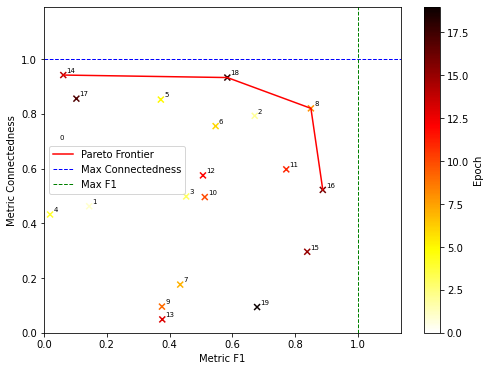

In [6]:
pareto_frontier = data
pareto_frontier = calculate_pareto_frontier(pareto_frontier)
plot_pareto_frontier(data, pareto_frontier)

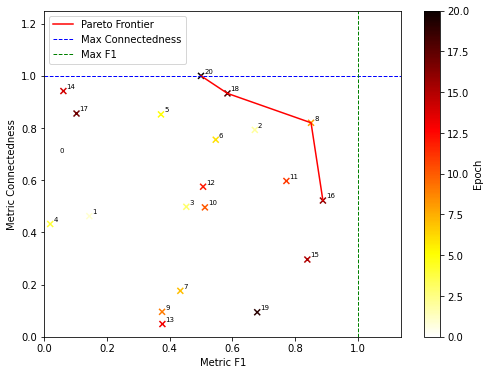

yes


In [7]:
p = {'f1': .5, 'connectedness': 1, 'epoch': 20}
data = [p, *data]
pareto_frontier = [p, *pareto_frontier]

pareto_frontier = calculate_pareto_frontier(pareto_frontier)
plot_pareto_frontier(data, pareto_frontier)

if p in pareto_frontier:
    print('yes')
else:
    print('no')

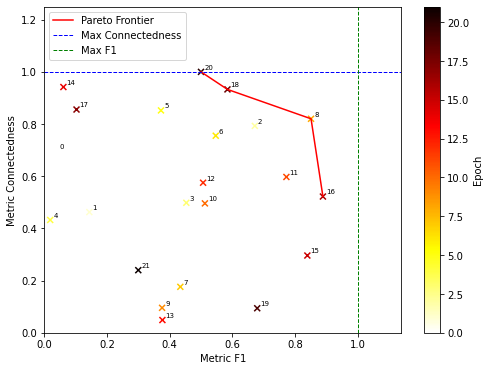

no


In [8]:
p = {'f1': .3, 'connectedness': .24, 'epoch': 21}
data = [p, *data]
pareto_frontier = [p, *pareto_frontier]

pareto_frontier = calculate_pareto_frontier(pareto_frontier)
plot_pareto_frontier(data, pareto_frontier)

if p in pareto_frontier:
    print('yes')
else:
    print('no')